# Student's t distribution

For more information, see chapters 9 and 12

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

In [67]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

Student's t distribution is defined as an ensamble of normal distributions "weighted" by precision terms $\tau$ that are Gamma-distributed. That is

$$
\begin{aligned}
    p(x|\mu, \alpha, \beta) &= \int_0^\infty \mathcal{N}\left(x |\mu, \tau^{-1}\right)\text{Gam}(\tau|\alpha, \beta) \ d\tau \\
    &= \frac{\beta^\alpha}{\Gamma(\alpha)}\left(\frac{1}{2\pi}\right)^{1/2}\left[b + \frac{(x - \mu)^2}{2}\right]^{-a - 1/2} \Gamma\left(a + \frac{1}{2}\right)
\end{aligned}
$$

Defining $\nu = 2\alpha$, $\lambda = \alpha/\beta$ and rearranging, we obtain the final form of the distribution in the form

$$
    \text{St}(x\vert\mu,\lambda,\nu) = \frac{\Gamma(\nu/2 + 1/2)}{\Gamma(\nu/2)}\left(\frac{\lambda}{\pi\nu}\right)^{1/2}\left[1 + \frac{\lambda(x - \mu)^{-\nu/2 - 1/2}}{\nu}\right]
$$

* $\nu$ is known as the degrees of freedom of the distribution;
* $\lambda$ is known as the precision of the distribution

In [42]:
def students(x, mu, lmbda, nu):
    """
    Generates a function that returns the value
    of the pdf of a Student's-t distribution
    
    Parameters
    ----------
    x: float, np.array
        Values to evaluate the pdf at
    mu: float
        The mean of the distribution
    lmbda: float
        The precision of the distribution
    nu: float
        The degrees of freedom of the distributino
    """
    const = gamma(nu / 2 + 1 / 2) / gamma(nu / 2) * np.sqrt(lmbda / (np.pi * nu))
    pdf = const * (1 + (lmbda * (x - mu) ** 2) / nu) ** (-nu / 2 - 1 / 2)
    return pdf

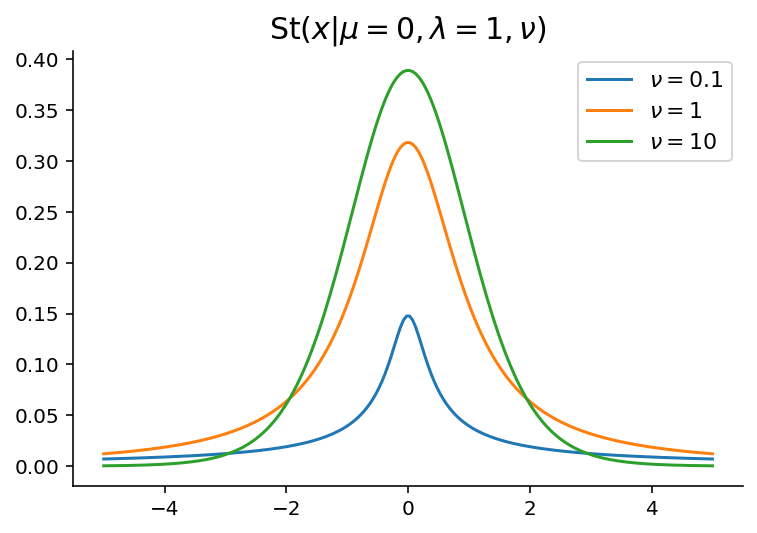

In [79]:
mu, lmbda= 0, 1

xrange = np.linspace(-5, 5, 200)

nus = [0.1, 1, 10]
for nu in nus:
    pdf = students(xrange, mu, lmbda, nu)
    plt.plot(xrange, pdf, label=rf"$\nu={nu}$");
plt.title(r"$\mathrm{St}"rf"(x\vert\mu={mu}, \lambda={lmbda}, \nu)$", fontsize=15)
plt.legend(fontsize=11);